<a href="https://colab.research.google.com/github/gkr0828/gkr0828/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_8%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as tfhub #tensorflow hub

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


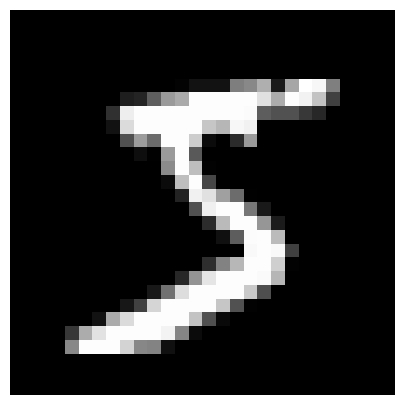

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

def plot_image(data, idx):
  plt.figure(figsize = (5,5))
  plt.imshow(data[idx],cmap = 'gray')
  plt.axis('off')
  plt.show()
plot_image(x_train, 0)

In [ ]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [ ]:
#정규화 실시
x_train = x_train/x_train.max()
x_valid = x_valid/x_valid.max()

In [ ]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#마지막에 흑백 색상 채널 추가
x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]
print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
# 3차원에서 2차원으로 축소 : Conv2D, kernel: 3X3, name: 레이어 이름 conv, 활성화함수 : ReLU,
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (28,28,1),name = 'conv'),
    tf.keras.layers.MaxPool2D((2,2), name = 'pool'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_valid, y_valid), epochs =10)

Epoch 1/10
1875/1875 [==============================] - 36s 18ms/step - loss: 0.5354 - accuracy: 0.9412 - val_loss: 0.1072 - val_accuracy: 0.9694
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0839 - accuracy: 0.9750 - val_loss: 0.1285 - val_accuracy: 0.9651
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0735 - accuracy: 0.9772 - val_loss: 0.1053 - val_accuracy: 0.9723
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0634 - accuracy: 0.9815 - val_loss: 0.0976 - val_accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0550 - accuracy: 0.9839 - val_loss: 0.1151 - val_accuracy: 0.9743
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0477 - accuracy: 0.9858 - val_loss: 0.1484 - val_accuracy: 0.9712
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0426 - accuracy: 0.9875 - val_loss: 0.1440 -

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 7ms/step - loss: 0.1984 - accuracy: 0.9737


[0.1983904093503952, 0.9736999869346619]

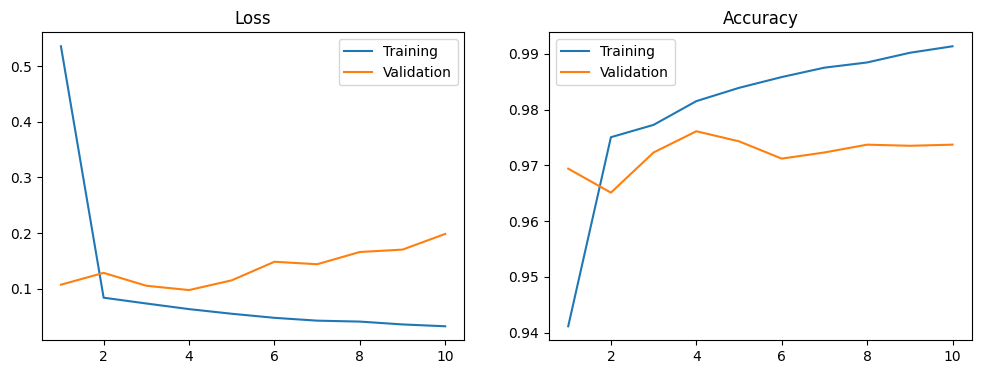

In [ ]:
loss, val_loss = history.history['loss'], history.history['val_loss']
acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
epoch=10
fig,axes = plt.subplots(1,2,figsize = (12,4))
axes[0].plot(range(1, epoch +1),loss, label = 'Training')
axes[0].plot(range(1, epoch +1),val_loss, label = 'Validation')
axes[0].legend(loc = 'best')
axes[0].set_title('Loss')

axes[1].plot(range(1, epoch +1),acc, label = 'Training')
axes[1].plot(range(1, epoch +1),val_acc, label = 'Validation')
axes[1].legend(loc = 'best')
axes[1].set_title('Accuracy')

plt.show()

# 모델 구조 파악
1. 입력 형태(28,28,1)
2. 출력형태(10)
3. 첫번째 레이어 : 합성곱Conv2D,가중치(weight)(3,3,1,32) 3332 = 280개, 상수항(biss) 32/output(26,26,1,32)
4. 두번째 레이어 : Pooling(26,26,1,32)
5. 세번째 레이어 : 1차 배열로 변환
6. 네번째 레이어 : 출력


In [ ]:
# 각 층에 대한 정보
model.layers

In [ ]:
#첫번째 레이어(Conv2D) 가중치 : 3*3*32=280개
model.layers[0].weights

In [ ]:
#첫번째 레이어의 커널 가중치
model.layers[0].kernel

In [ ]:
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.00917915, -0.12698494, -0.08318501, -0.13063143, -0.02533224,
       -0.23835006, -0.01583144, -0.07347399, -0.23963425, -0.02572663,
       -0.69734067, -0.05877764, -0.1048245 , -0.00263769, -0.01935899,
       -0.3469586 , -0.01328451, -0.31733802, -0.43044278, -0.01485918,
       -0.01061804, -0.06001255, -0.10635655, -0.55633694, -0.04805106,
       -0.4331703 , -0.17949635, -0.14969191, -0.3029822 , -0.0020766 ,
       -0.19172578, -0.02141828], dtype=float32)>

In [ ]:
#Conv2D 레이어 이름으로 소환하기
model.get_layer('conv')

In [ ]:
#Conv2D와 Pooling 레이어의 output(이미지)출력
#모델 만들기 : tf.keras.Model(입력 = 입력 데이터, 출력 = 첫번째, 두번째)
#모델 예측 : 모델명.predict()
activator = tf.keras.Model(inputs=model.input,outputs = [layer.output for layer in model.layers[:2]])

In [ ]:
#입력 데이터 첫번째 5에 대해 출력
activations = activator.predict(x_train_in[0][tf.newaxis, ...])
len(activations)
#Conv2D층과 Pooling층의 output 이므로 '2'라는 결과

1/1 [==============================] - 0s 85ms/step


2

In [ ]:
#activations[0]
conv=activations[0]
conv.shape

(1, 26, 26, 32)

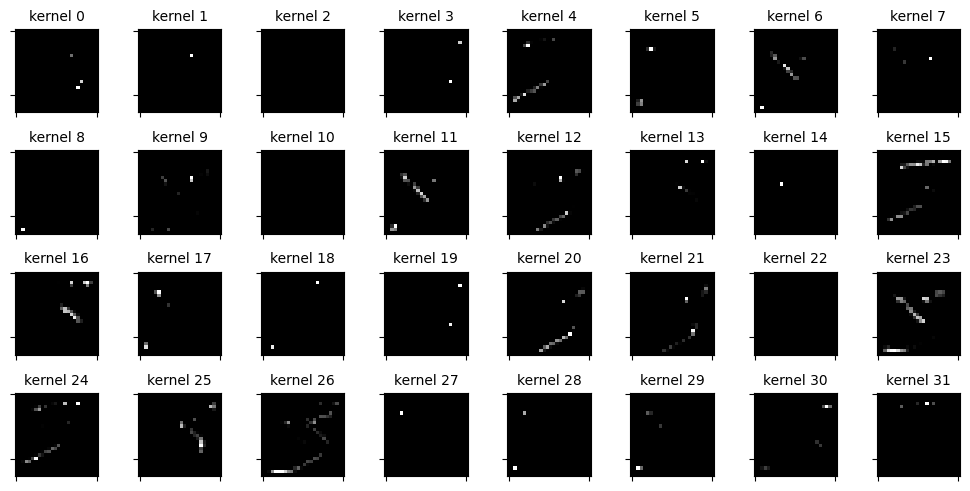

In [ ]:
#'5'의 첫번쨰 Conv2D를 통과한 32개 kernel별 특성맵 시각화
# Convolution 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  ax = axes[i//8, i%8]
  ax.imshow(conv[0,:,:,i], cmap = 'gray')
  ax.set_title('kernel %s'%str(i), fontsize=10)
  plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [ ]:
#activations[1]
pooling = activations[1]
pooling.shape

(1, 13, 13, 32)

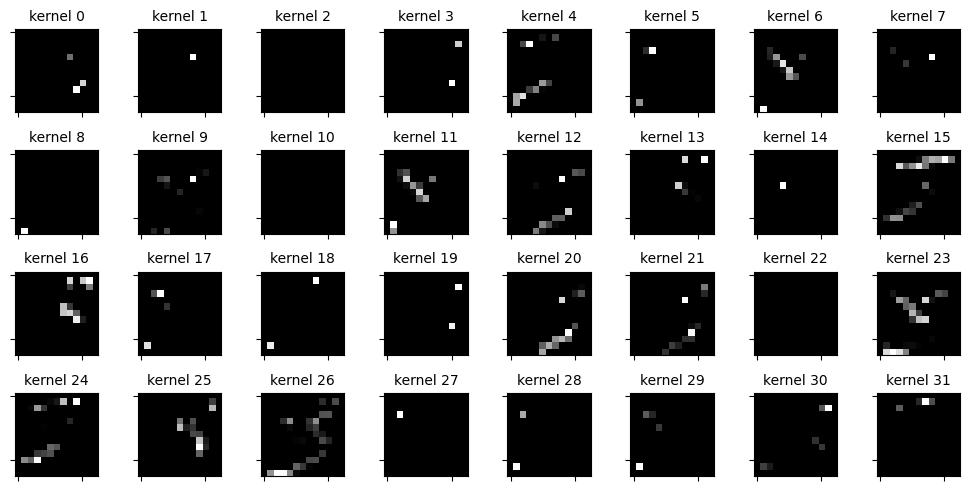

In [ ]:
#'5'의 두번째 Pooling를 통과한 32개 kernel별 특성맵 시각화
#Pooling 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  ax = axes[i//8, i%8]
  ax.imshow(pooling[0,:,:,i], cmap = 'gray')
  ax.set_title('kernel %s'%str(i), fontsize=10)
  plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

# 객체탐색

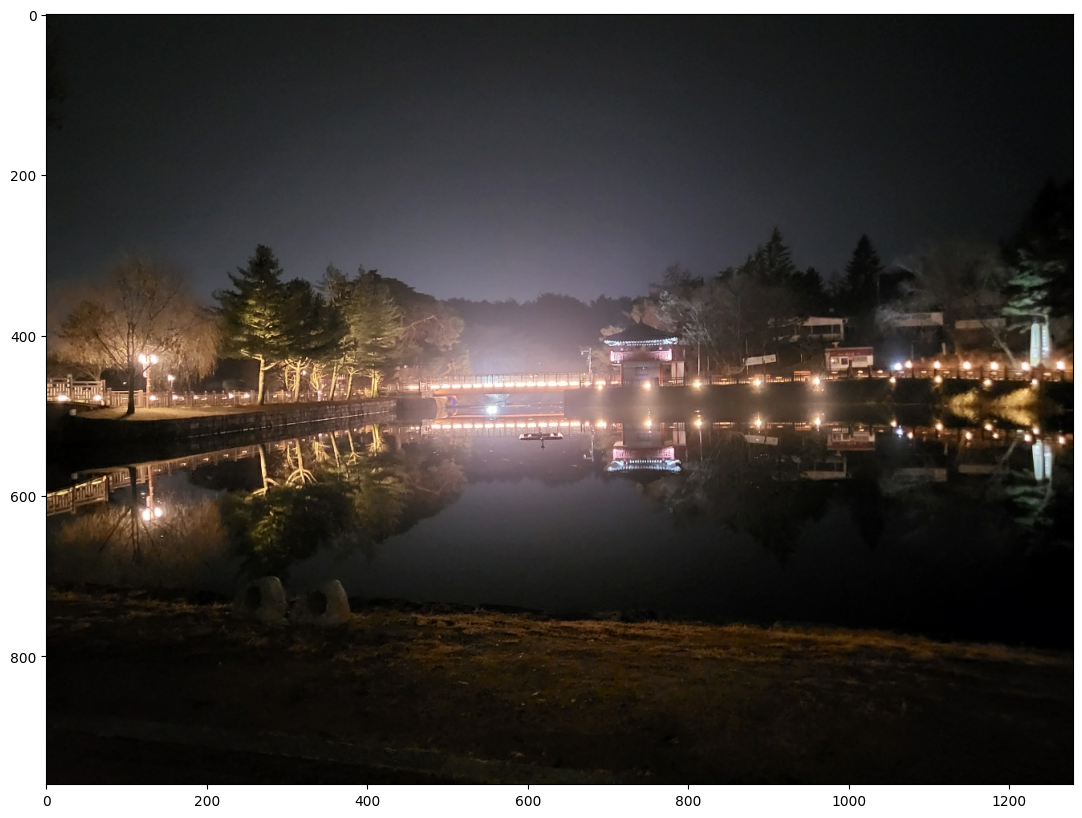

In [11]:
img_path='/KakaoTalk_20230507_233858574_01.jpg'
img = tf.keras.utils.get_file(fname='/KakaoTalk_20230507_233858574_01.jpg', origin = img_path)
img = tf.io.read_file(img) #파일 객체를 string으로 변환
img = tf.image.decode_jpeg(img, channels=3) #문자(string)를 숫자(unit8) 텐서로 변환
img = tf.image.convert_image_dtype(img, tf.float32) #0~1 범위로 정규화

import matplotlib.pylab as plt
plt.figure(figsize=(15, 10))
plt.imshow(img)

In [12]:
img.shape

TensorShape([960, 1280, 3])

In [13]:
# batch_size 추가, 4차원 텐서로 입력
img_input = tf.expand_dims(img, 0)
img_input.shape

TensorShape([1, 960, 1280, 3])

In [15]:
# TensorFlow Hub에서 모델 가져오기 - FasterRCNN+lnceptionResNet V2
model = tfhub.load("http://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1")

In [16]:
#모델 시그니처(용도) 확인
model.signatures.keys()

KeysView(_SignatureMap({'default': <ConcreteFunction pruned(images) at 0x7FBC51BE6F80>}))

In [17]:
#객체탐지 모델 생성
obj_detector = model.signatures['default']
obj_detector

<ConcreteFunction pruned(images) at 0x7FBC51BE6F80>

In [18]:
#모델을 이용하여 예측(추론)
result = obj_detector(img_input)
result.keys()

dict_keys(['detection_scores', 'detection_class_names', 'detection_class_entities', 'detection_class_labels', 'detection_boxes'])

In [19]:
type(result)

dict

In [ ]:
for key, value in result.items():
    print(key,value)

In [21]:
labesls = result["detection_class_labels"]
names=result['detection_class_names']

In [22]:
boxes=result["detection_boxes"] # Bounding Box 좌표 예측값
labels=result["detection_class_entities"] #클래스 값
scores=result["detection_scores"] #신뢰도(confidence)

In [23]:
#탐지한 객체의 개수
len(result["detection_scores"])

100

In [24]:
result.keys()

dict_keys(['detection_scores', 'detection_class_names', 'detection_class_entities', 'detection_class_labels', 'detection_boxes'])

In [25]:
img.shape

TensorShape([960, 1280, 3])

In [26]:
boxes=result["detection_boxes"]
labels=result["detection_class_entities"]
scores=result["detection_scores"]

In [ ]:
result["detection_scores"]

In [28]:
result["detection_boxes"][0]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.31174725, 0.02302309, 0.5062218 , 0.15750267], dtype=float32)>

In [ ]:
result["detection_class_entities"]

In [ ]:
img_height, img_width = img.shape[0], img.shape[1]
obj_to_detect = 10
for i in range(min(obj_to_detect, boxes.shape[0])):
  if scores[i] >= 0.2:
      (ymax, xmin, ymin, xmax) = (boxes[i][0]*img_height, boxes[i][1]*img_width,
                                  boxes[i][2]*img_height, boxes[i][3]*img_width)
  print("{} : ({}, {}, {}. {})".format(scores[i],ymax, xmin, ymin, xmax))

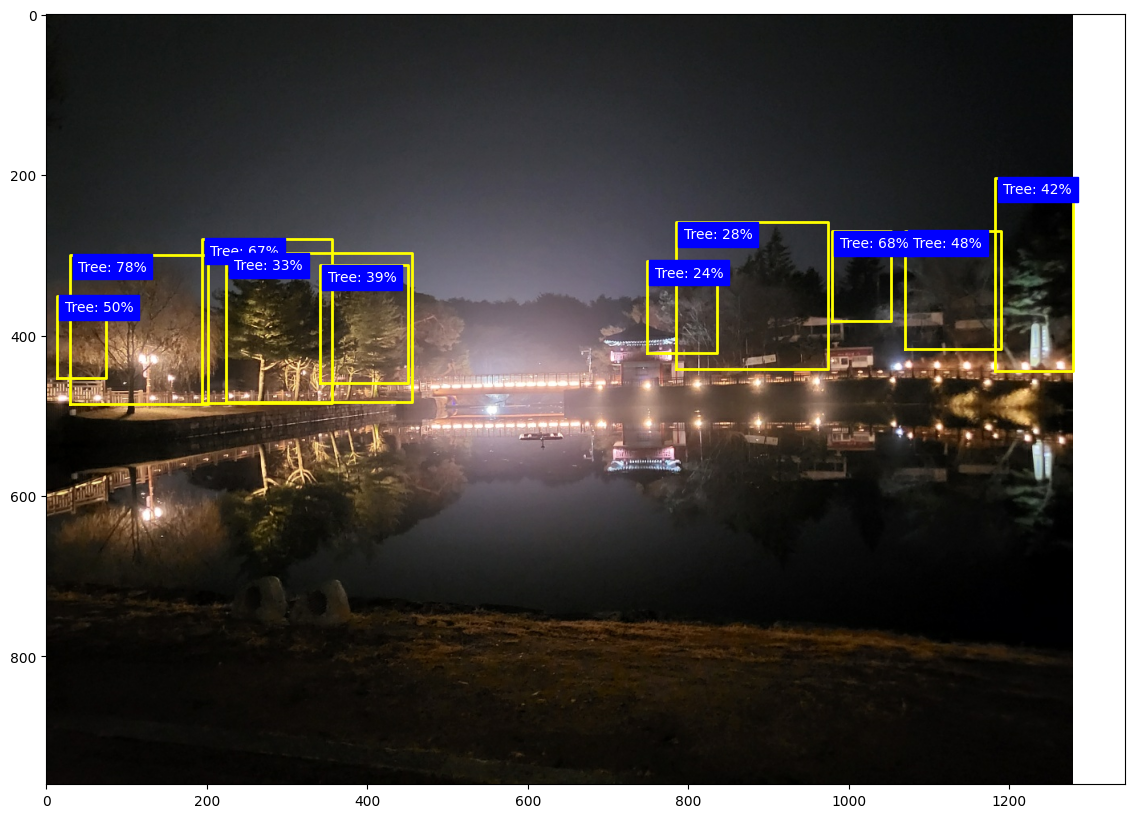

In [31]:
#객체 탐지 결과 시각화 하기
boxes=result["detection_boxes"]
labels=result["detection_class_entities"] 
scores=result["detection_scores"]

# 샘플 이미지 가로 세로 크기
img_height, img_width = img.shape[0], img.shape[1]

#탐지 할 최대 객체 수
obj_to_detect = 10

#시각화
plt.figure(figsize=(15, 10))
for i in range(min(obj_to_detect, boxes.shape[0])):
  if scores[i]>= 0.2:
    (ymax, xmin, ymin, xmax) = (boxes[i][0]*img_height, boxes[i][1]*img_width,
                                boxes[i][2]*img_height, boxes[i][3]*img_width)
    
    plt.imshow(img)
    plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin],
             color = 'yellow', linewidth=2)
    
    class_name = labels[i].numpy().decode('utf-8')
    infer_score = int(scores[i].numpy()*100)
    annotation = "{}: {}%".format(class_name, infer_score)
    plt.text(xmin+10, ymax+20, annotation,
             color='white',backgroundcolor='blue', fontsize=10)